In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [2]:
#Load data
#movie_ratings = pd.read_csv('/kaggle/input/the-movies-dataset/ratings.csv')
movie_metadata = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv', low_memory=False)

In [3]:
#movie_ratings.head()

In [4]:
#Find the average rating for each movie
#movie_ratings = movie_ratings.groupby('movieId').agg({'rating':'mean'})
#movie_ratings.head()

In [5]:
movie_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
movie_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

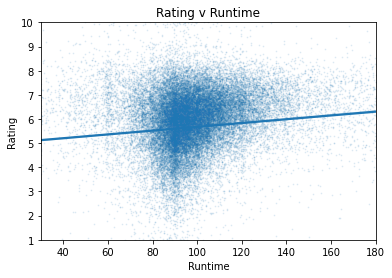

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

movie_metadata['runtime_norm'] = movie_metadata['runtime'] + np.random.normal(0,1, len(movie_metadata['runtime']))
movie_metadata['rating_norm'] = movie_metadata['vote_average'] + np.random.normal(0,0.2, len(movie_metadata['vote_average']))

sns.regplot(x='runtime_norm', y='rating_norm', data=movie_metadata, scatter_kws={'alpha':0.1, 's':0.75}, order=1)
plt.xlim([30,180])
plt.ylim([1,10])
plt.xlabel('Runtime')
plt.ylabel('Rating')
plt.title('Rating v Runtime')
plt.show()

In [8]:
movie_metadata['vote_average'].describe

<bound method NDFrame.describe of 0        7.7
1        6.9
2        6.5
3        6.1
4        5.7
        ... 
45461    4.0
45462    9.0
45463    3.8
45464    0.0
45465    0.0
Name: vote_average, Length: 45466, dtype: float64>

In [9]:
import ast
movie_metadata['genres'] = movie_metadata['genres'].apply(ast.literal_eval) #to convert the strings to lists of dicts

In [10]:
length =len(movie_metadata['genres'])
list_of_lengths = movie_metadata['genres'].apply(len)

In [11]:
list_of_lengths

0        3
1        3
2        2
3        3
4        1
        ..
45461    2
45462    1
45463    3
45464    0
45465    0
Name: genres, Length: 45466, dtype: int64

In [12]:
#extract the genres from dicts and add it to a list
list_of_genres = []
for i in range(length):
    string = ''
    for j in range(list_of_lengths[i]):
        string = string + '/' + movie_metadata['genres'][i][j]['name']
    list_of_genres.append(string[1:])
    
movie_metadata['genres'] = list_of_genres #the new 'genres' column should now include the different genres separated by '/'

In [13]:
horror_movies = movie_metadata[movie_metadata['genres'].str.contains('Horror')]
drama_movies = movie_metadata[movie_metadata['genres'].str.contains('Drama')]

In [14]:
print(horror_movies['vote_average'].mean())
print(drama_movies['vote_average'].mean())

5.230393835616438
5.905221081721279


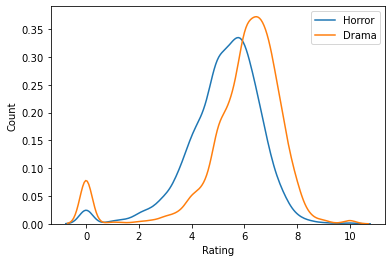

In [15]:
sns.kdeplot(horror_movies['vote_average'], label='Horror')
sns.kdeplot(drama_movies['vote_average'], label='Drama')
plt.legend()
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

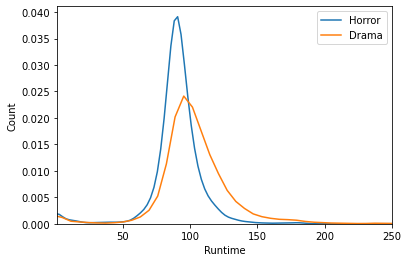

In [16]:
sns.kdeplot(horror_movies['runtime'], label='Horror')
sns.kdeplot(drama_movies['runtime'], label='Drama')
plt.xlabel('Runtime')
plt.ylabel('Count')
plt.legend()
plt.xlim([1,250])

plt.show()

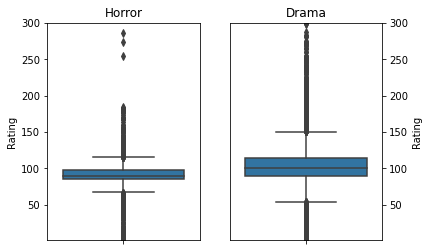

In [17]:
fig, ax = plt.subplots(1,2)
sns.boxplot(data = horror_movies, y='runtime', ax=ax[0])
ax[0].set_ylabel('Rating')
ax[0].set_ylim([1,300])
ax[0].set_title('Horror')

sns.boxplot(data = drama_movies, y='runtime', ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_ylim([1,300])
#ax[1].set_yticklabels([])
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_ylabel('Rating')
ax[1].set_title('Drama')


plt.show()